In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df_raw = pd.read_csv("rawdata/체질검사.csv")

df_raw.head(5)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [3]:
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False)

In [6]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, \
                                                                test_size = 0.3, random_state = 1234)

print ("Train data X size\t: {}".format(df_train_x.shape))
print ("Train data Y size\t: {}".format(df_train_y.shape))
print ("Test data X size\t: {}".format(df_test_x.shape))
print ("Test data Y size\t: {}\n".format(df_test_y.shape))

knn_uncustomized = KNeighborsRegressor()
knn_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set:\t%.3f" %(knn_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set:\t%.3f" %(knn_uncustomized.score(df_test_x, df_test_y)))

Train data X size	: (176, 13)
Train data Y size	: (176,)
Test data X size	: (76, 13)
Test data Y size	: (76,)

Score on training set:	0.740
Score on test set:	0.539


In [7]:
knn_uncustomized

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [8]:
train_score = []; test_score=[]

para_n_neighbors = [i for i in range (1,16)]

for v_n_neighbors in para_n_neighbors:
    kn = KNeighborsRegressor(n_neighbors = v_n_neighbors)
    kn.fit(df_train_x, df_train_y)
    train_score.append(kn.score(df_train_x, df_train_y))
    test_score.append(kn.score(df_test_x, df_test_y))

df_score_knn = pd.DataFrame()
df_score_knn["n_neighbors"] = para_n_neighbors
df_score_knn["TrainScore"] = train_score
df_score_knn["TestScore"] = test_score

df_score_knn.round(3)

,n_neighbors,TrainScore,TestScore
0,1,1.000,0.260
1,2,0.841,0.416
2,3,0.793,0.468
3,4,0.755,0.512
4,5,0.740,0.539
5,6,0.720,0.515
6,7,0.700,0.499
7,8,0.687,0.516
8,9,0.664,0.518
9,10,0.646,0.524


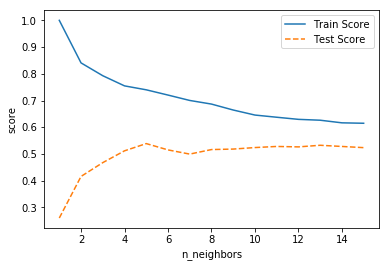

In [10]:
plt.plot(para_n_neighbors, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_neighbors, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_neighbors")
plt.legend()

In [15]:
train_score = []; test_score=[]

para_n_neighbors = [i for i in range (1,11)] * 2

para_weights = (["uniform"] * 10) + (["distance"] * 10)

for (v_n_neighbors, v_weight) in zip(para_n_neighbors, para_weights):
    kn = KNeighborsRegressor(n_neighbors = v_n_neighbors, weights = v_weight)
    kn.fit(df_train_x, df_train_y)
    train_score.append(kn.score(df_train_x, df_train_y))
    test_score.append(kn.score(df_test_x, df_test_y))

df_score_weight = pd.DataFrame()
df_score_weight["Neighbors"] = para_n_neighbors
df_score_weight["Weights"] = para_weights
df_score_weight["TrainScore"] = train_score
df_score_weight["TestScore"] = test_score

df_score_knn.round(3)

,n_neighbors,TrainScore,TestScore
0,1,1.000,0.260
1,2,0.841,0.416
2,3,0.793,0.468
3,4,0.755,0.512
4,5,0.740,0.539
5,6,0.720,0.515
6,7,0.700,0.499
7,8,0.687,0.516
8,9,0.664,0.518
9,10,0.646,0.524


In [16]:
df_score_weight_pivot = df_score_weight.pivot(index="Neighbors", columns="Weights", values = ["TrainScore", "TestScore"])
df_score_weight_pivot.head()

TrainScore           TestScore          
Weights     distance   uniform  distance   uniform
Neighbors                                         
1                1.0  1.000000  0.260301  0.260301
2                1.0  0.840753  0.431951  0.415927
3                1.0  0.792742  0.487390  0.467537
4                1.0  0.754752  0.527435  0.511723
5                1.0  0.740025  0.550285  0.538785

In [17]:
level0 = df_score_weight_pivot.columns.get_level_values(0)
level1 = df_score_weight_pivot.columns.get_level_values(1)
df_score_weight_pivot.columns = level0 + "_" + level1
df_score_weight_pivot.head()

,TrainScore_distance,TrainScore_uniform,TestScore_distance,TestScore_uniform
Neighbors,,,,
1,1.0,1.000000,0.260301,0.260301
2,1.0,0.840753,0.431951,0.415927
3,1.0,0.792742,0.487390,0.467537
4,1.0,0.754752,0.527435,0.511723
5,1.0,0.740025,0.550285,0.538785


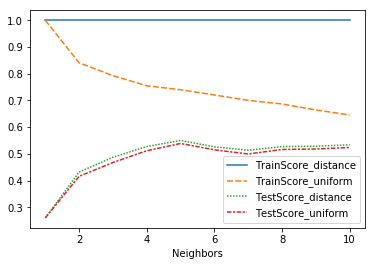

In [18]:
sns.lineplot(data = df_score_weight_pivot)

In [22]:
train_score = []; test_score=[]

para_n_neighbors = [i for i in range (1,11)] * 3

para_weights = (["uniform"] * 10) + (["distance"] * 10)
para_metric = ["minkowski"] * 10 + ["euclidean"] * 10 + ["manhattan"] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    kn = KNeighborsRegressor(n_neighbors = v_n_neighbors, metric = v_metric, weights = "uniform")
    kn.fit(df_train_x, df_train_y)
    train_score.append(kn.score(df_train_x, df_train_y))
    test_score.append(kn.score(df_test_x, df_test_y))

df_score_metric = pd.DataFrame()
df_score_metric["Neighbors"] = para_n_neighbors
df_score_metric["Metric"] = para_metric
df_score_metric["TrainScore"] = train_score
df_score_metric["TestScore"] = test_score

df_score_knn.round(3)

,n_neighbors,TrainScore,TestScore
0,1,1.000,0.260
1,2,0.841,0.416
2,3,0.793,0.468
3,4,0.755,0.512
4,5,0.740,0.539
5,6,0.720,0.515
6,7,0.700,0.499
7,8,0.687,0.516
8,9,0.664,0.518
9,10,0.646,0.524


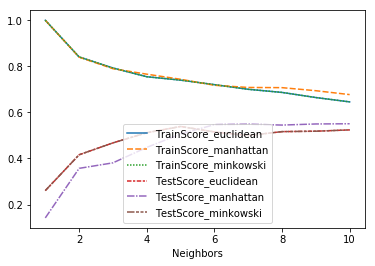

In [24]:
df_score_metric_pivot = df_score_metric.pivot(index="Neighbors", columns="Metric", values = ["TrainScore", "TestScore"])
level0 = df_score_metric_pivot.columns.get_level_values(0)
level1 = df_score_metric_pivot.columns.get_level_values(1)
df_score_metric_pivot.columns = level0 + "_" + level1
df_score_metric_pivot.head()

sns.lineplot(data = df_score_metric_pivot)

In [26]:
knn_final = KNeighborsRegressor(n_neighbors = 5, metric = "euclidean", weights = "uniform")
knn_final.fit(df_train_x, df_train_y)

print("Score on trainig set\t: %.3f" % knn_final.score(df_train_x, df_train_y))
print("Score on test set\t: %.3f" % knn_final.score(df_test_x, df_test_y))


Score on trainig set	: 0.740
Score on test set	: 0.539


In [30]:
estimator = KNeighborsRegressor()
param_grid = {"n_neighbors": para_n_neighbors, "weights":para_weights, "metric": para_metric}

grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("Best estimator vmodel: \n{}".format(grid_dt.best_estimator_))
print("Best Parameter: \n{}".format(grid_dt.best_params_))
print("Best score: {}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best estimator vmodel: 
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
          metric_params=None, n_jobs=None, n_neighbors=6, p=2,
          weights='distance')
Best Parameter: 
{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Best score: 0.619


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [31]:
knn_final = KNeighborsRegressor(n_neighbors = 6, metric = "manhattan", weights = "distance")
knn_final.fit(df_train_x, df_train_y)

print("Score on trainig set\t: %.3f" % knn_final.score(df_train_x, df_train_y))
print("Score on test set\t: %.3f" % knn_final.score(df_test_x, df_test_y))


Score on trainig set	: 1.000
Score on test set	: 0.548
